<a href="https://colab.research.google.com/github/PandiRaja18/Deep-Learning/blob/main/Python_and_DeepLearning_Bootcamp_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

**CNN Model**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_7 (Batc  (None, 6, 6, 64)        

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer='l2'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,kernel_regularizer='l2'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_7 (Batc  (None, 6, 6, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0457 - accuracy: 0.4372 - val_loss: 1.6742 - val_accuracy: 0.4671
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3936 - accuracy: 0.5723 - val_loss: 1.5354 - val_accuracy: 0.5103
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2831 - accuracy: 0.6176 - val_loss: 1.2271 - val_accuracy: 0.6332
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2209 - accuracy: 0.6432 - val_loss: 1.2137 - val_accuracy: 0.6415
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1869 - accuracy: 0.6580 - val_loss: 1.1452 - val_accuracy: 0.6693
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1491 - accuracy: 0.6693 - val_loss: 1.5886 - val_accuracy: 0.5604
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1215 - accuracy: 0.6833 - val_loss: 1.2139 - val_ac

313/313 - 1s - loss: 0.9579 - accuracy: 0.7404 - 1s/epoch - 4ms/step


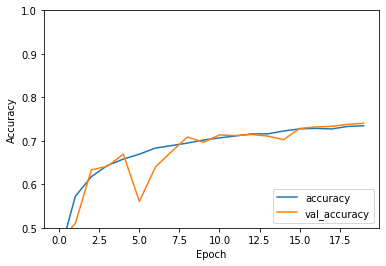

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
Pred=model.predict(train_images)
print(Pred)

[[-2.4964306  -3.2156613  -0.1242882  ... -0.6150246  -2.6454268
  -2.5003355 ]
 [-0.06445166  0.73849654 -2.2655919  ...  0.43227485  0.82309866
   7.8763094 ]
 [ 0.48449895  0.65891314 -1.0537192  ...  0.48920476 -0.10094571
   4.4723554 ]
 ...
 [ 0.8216113   0.30781195 -1.3377272  ...  0.5492686   1.4528202
   5.434195  ]
 [ 1.2739931   5.554679   -2.8819308  ... -2.486443    4.435038
   4.8647075 ]
 [ 1.1084236   2.989743   -1.1991245  ... -1.0516638   1.6022505
   1.8568312 ]]


In [ ]:
print(f"Test Loss : {test_loss} and Test accuracy :{test_acc}")

Test Loss : 0.9579065442085266 and Test accuracy :0.7404000163078308
